In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

### 데이터 준비

In [22]:
df = pd.read_csv('btc.csv')
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023- 12- 31,"42,272.5","42,141.6","42,878.8","41,971.4",35.58K,0.32%
1,2023- 12- 30,"42,136.7","42,074.7","42,592.2","41,527.3",35.18K,0.15%
2,2023- 12- 29,"42,072.4","42,581.1","43,108.0","41,459.0",60.98K,-1.19%
3,2023- 12- 28,"42,581.1","43,446.5","43,782.6","42,309.3",49.84K,-1.99%
4,2023- 12- 27,"43,446.5","42,514.3","43,676.7","42,115.3",50.10K,2.20%
...,...,...,...,...,...,...,...
1456,2020- 01- 05,"7,372.5","7,376.8","7,501.0","7,345.6",628.14K,-0.06%
1457,2020- 01- 04,"7,376.8","7,345.1","7,433.1","7,291.4",523.91K,0.46%
1458,2020- 01- 03,"7,343.1","6,967.1","7,402.9","6,884.1",936.29K,5.40%
1459,2020- 01- 02,"6,967.0","7,199.7","7,209.6","6,901.4",632.78K,-3.23%


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1461 non-null   object
 1   종가      1461 non-null   object
 2   시가      1461 non-null   object
 3   고가      1461 non-null   object
 4   저가      1461 non-null   object
 5   거래량     1461 non-null   object
 6   변동 %    1461 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


In [24]:
# 데이터 타입 float 형태로 변환

columns = ['종가', '시가', '고가', '저가', '거래량', '변동 %']

for col in columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

In [25]:
# date 컬럼을 시계열 데이터로 변환

df['날짜'] = pd.to_datetime(df['날짜'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1461 non-null   datetime64[ns]
 1   종가      1461 non-null   float64       
 2   시가      1461 non-null   float64       
 3   고가      1461 non-null   float64       
 4   저가      1461 non-null   float64       
 5   거래량     0 non-null      float64       
 6   변동 %    0 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [27]:
# 추가한 date 컬럼을 인덱스로 변환

df = df.set_index('날짜')

In [28]:
df

,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2023-12-31,42272.5,42141.6,42878.8,41971.4,NaN,NaN
2023-12-30,42136.7,42074.7,42592.2,41527.3,NaN,NaN
2023-12-29,42072.4,42581.1,43108.0,41459.0,NaN,NaN
2023-12-28,42581.1,43446.5,43782.6,42309.3,NaN,NaN
2023-12-27,43446.5,42514.3,43676.7,42115.3,NaN,NaN
...,...,...,...,...,...,...
2020-01-05,7372.5,7376.8,7501.0,7345.6,NaN,NaN
2020-01-04,7376.8,7345.1,7433.1,7291.4,NaN,NaN
2020-01-03,7343.1,6967.1,7402.9,6884.1,NaN,NaN


In [29]:
# df = df.sort_values(by='날짜', ascending=True)

In [10]:
# df

### 전체적인 추이

In [30]:
df20 = df.loc['2020']
df21 = df.loc['2021']
df22 = df.loc['2022']
df23 = df.loc['2023']

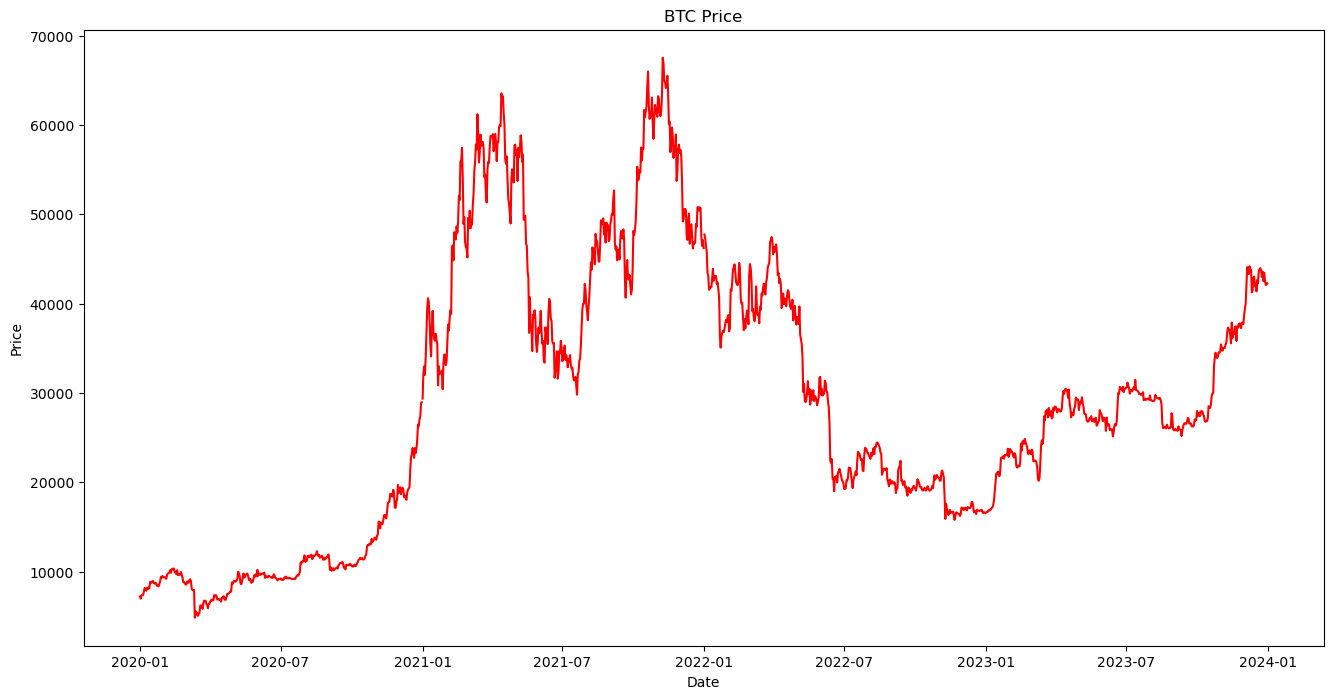

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(df20.index, df20['종가'], color='r')
plt.plot(df21.index, df21['종가'], color='r')
plt.plot(df22.index, df22['종가'], color='r')
plt.plot(df23.index, df23['종가'], color='r')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC Price')

plt.show()

- 추세성, 경향성X -> 정상성을 따르는지 확인 필요

In [33]:
# ADF 검정 실행

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
timeseries_data = df['종가']

adf_test(timeseries_data)

ADF Statistic: -1.3779981332485185
p-value: 0.5927774645846697
Critical Values: {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}


- p-value가 0.05 보다 크므로 귀무가설(시계열 데이터에 단위근이 존재) 채택
- 즉, 정상성을 만족하고 있지 않은 데이터임을 확인

### 그냥 메모
- Random Forest 사용... 보통 xgboost 사용
- 거래량과 가중 평균 상관관계 파악
- 결측치 처리
- 여기서 시계열 데이터를 어떻게 이용 및 처리할껀지
- 이상치 처리
- 퀀트 트레이딩 분야에서의 변동성 이용 + 향후 변동성

In [34]:
# 정상성 위한 1차 차분 수행

df['종가_diff'] = df['종가'].diff().dropna()

In [35]:
# XGBoost에 입력으로 사용할 특성 선택 (여기서는 1차 차분된 종가만 사용)

features = ['종가_diff']

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 예측을 위한 데이터셋 생성
X = df[features]
y = df['종가']

# 데이터를 훈련 세트와 테스트 세트로 분할
split_index = int(0.8 * len(df))
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

In [1]:
# Grid Search를 위한 하이퍼파라미터 조합 찾기
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300] }

In [42]:
# 객체 생성
xgb_model = XGBRegressor(objective='reg:squarederror')

# Time Series Cross-Validation을 사용하여 Grid Search 수행
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)  # 시계열 데이터에 적합한 교차 검증
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# 최적 모델 획득
best_model = grid_search.best_estimator_

# 테스트 데이터를 사용하여 예측
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


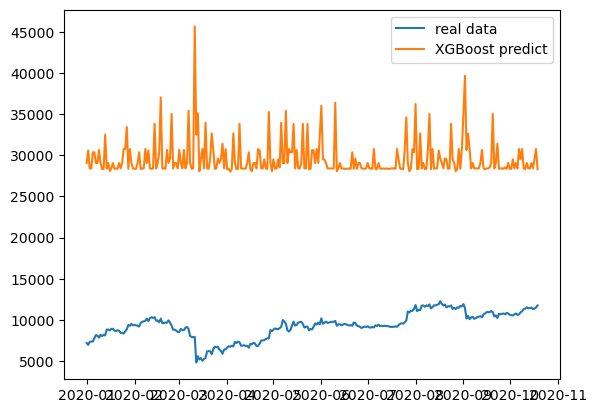

In [43]:
plt.plot(df.index[-len(y_test):], y_test, label='real data')
plt.plot(df.index[-len(y_test):], y_pred, label='XGBoost predict')
plt.legend()
plt.show()

In [19]:
# 모델 성능 평가 (평균 제곱 오차 사용)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 430339828.97862774
